In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Generate deterministic data and save to CSV

data = {
    "feature1": [-4, -3, -3, -2, -2, -1, -1, -0.5, 0.5, 1, 1, 2, 2, 3, 3, 4],
    "feature2": [-4, -3, -2, -2, -1, -1, -0.5, -0.2, 0.2, 0.5, 1, 1, 2, 2, 3, 4],
    "label":    [0,   0,   0,   0,   0,   0,   0,    0,    1,  1, 1,  1,  1,  1,  1,  1]
}

df = pd.DataFrame(data)
df.to_csv("logistic_regression_data.csv", index=False)

In [6]:
df.head()

,feature1,feature2,label
0,-4.0,-4.0,0
1,-3.0,-3.0,0
2,-3.0,-2.0,0
3,-2.0,-2.0,0
4,-2.0,-1.0,0


In [7]:
# 2. Load data from CSV

df = pd.read_csv("logistic_regression_data.csv")

X_features = df[["feature1", "feature2"]].values
y = df["label"].values

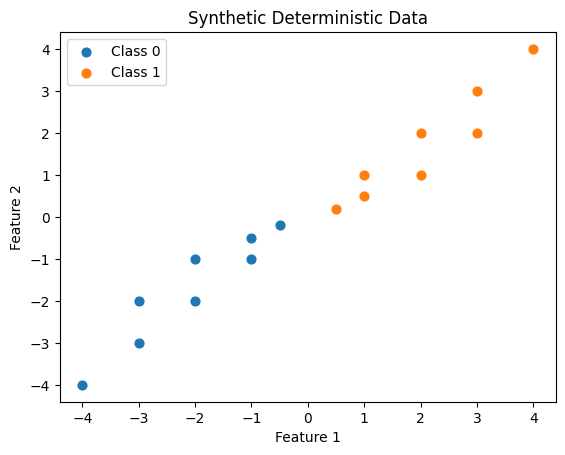

In [8]:
# 3. Scatter plot of data

plt.scatter(X_features[y == 0, 0], X_features[y == 0, 1],
            label="Class 0", s=40)

plt.scatter(X_features[y == 1, 0], X_features[y == 1, 1],
            label="Class 1", s=40)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Deterministic Data")
plt.legend()
plt.show()

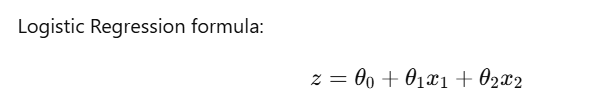

In [9]:
# 4. Add bias term

# Creates a columns of 1
X = np.c_[np.ones(X_features.shape[0]), X_features]

# X_features.shape = (m, 2)
# X_features.shape[0] = no of row
# np.ones(m) will create a vector of 1 ->  [1, 1, 1, 1, ..., 1]
# creates a column of 1s,
# np.c_[column1, column2] - > Concatenates arrays column-wise
# concatenates thecolumn of 1 with the original features
# Think: “put this column next to that column”



In [17]:
print(X[:5])

[[ 1. -4. -4.]
 [ 1. -3. -3.]
 [ 1. -3. -2.]
 [ 1. -2. -2.]
 [ 1. -2. -1.]]


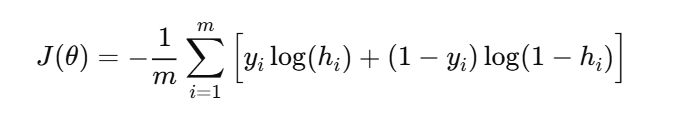

In [10]:
# 5. Logistic Regression functions

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# X @ theta → matrix multiplication
# z = θ0*1 + θ1*x1 + θ2*x2 + ...

def compute_cost(X, y, theta):
    m = len(y) # number of training examples
    h = sigmoid(X @ theta)
    cost = (-1 / m) * np.sum(
        y * np.log(h + 1e-15) + (1 - y) * np.log(1 - h + 1e-15)
    )
    return cost



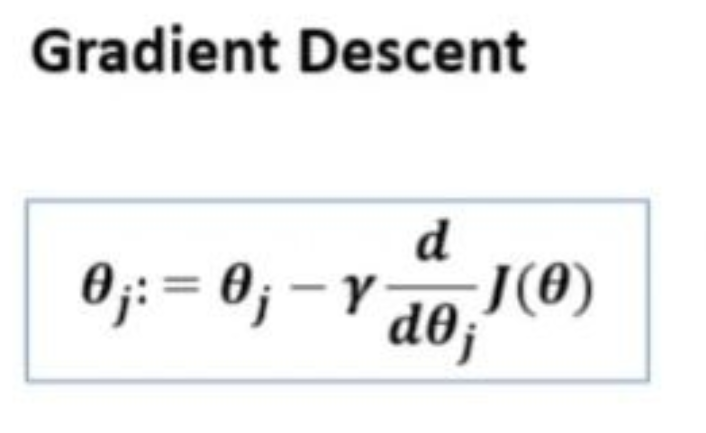

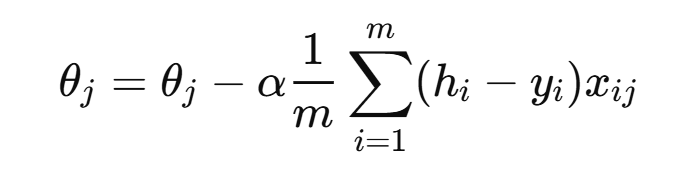

- i -> data point
- j -> feature

In [ ]:

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = []

    for _ in range(num_iters):
        h = sigmoid(X @ theta)

        gradient = (1 / m) * (X.T @ (h - y))
        theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history


def predict(X, theta, threshold=0.5):
    return sigmoid(X @ theta) >= threshold


In [11]:
# 6. Train model

theta = np.zeros(X.shape[1])
alpha = 0.1
num_iters = 2000

theta, cost_history = gradient_descent(X, y, theta, alpha, num_iters)

print("Optimized theta:", theta)
print("Final cost:", cost_history[-1])

predictions = predict(X, theta) # [True, False, True, True]
accuracy = np.mean(predictions == y) * 100
print("Training Accuracy:", accuracy, "%")

Optimized theta: [4.47558657e-17 3.96943539e+00 2.25451532e+00]
Final cost: 0.011505069183655419
Training Accuracy: 100.0 %


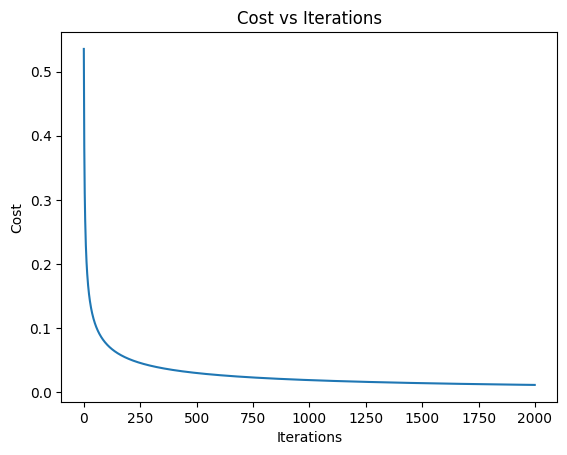

In [12]:
# 7. Cost vs Iterations plot

plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.show()

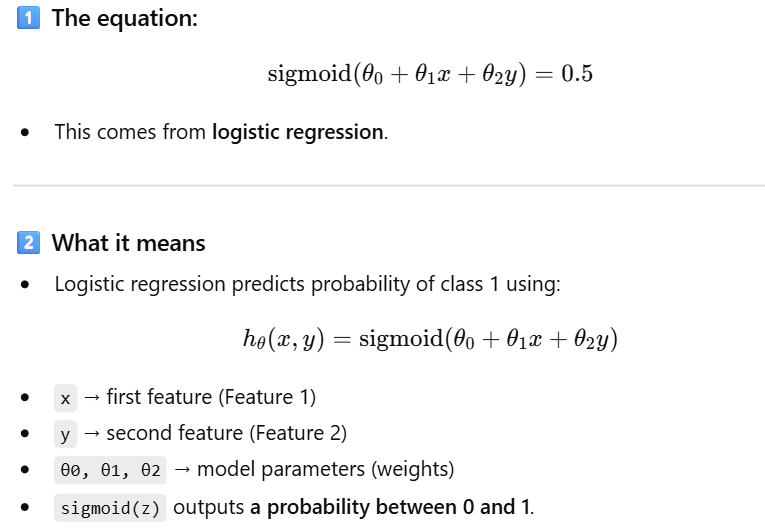

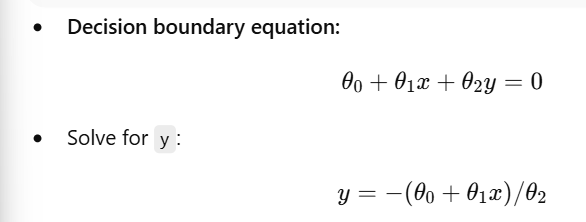

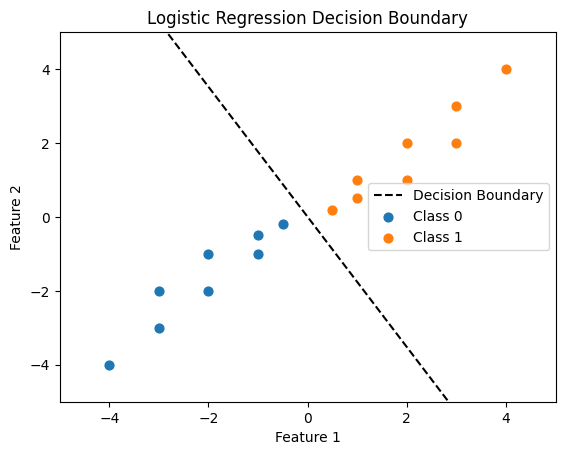

In [13]:
# 8. Decision boundary plot

# X_features[:, 0] → all rows, first feature (Feature 1)
# X_features[:, 1] → all rows, second feature (Feature 2)
# Subtract/add 1 → add some padding so points are not on the edge of the plot
# Result: the axes limits for the plot

xmin, xmax = X_features[:, 0].min() - 1, X_features[:, 0].max() + 1
ymin, ymax = X_features[:, 1].min() - 1, X_features[:, 1].max() + 1

x_vals = np.array([xmin, xmax]) # We need two points to draw a straight line (decision boundary)
y_vals = -(theta[0] + theta[1] * x_vals) / theta[2] # This gives the y-coordinates of the decision boundary for the two x-values (xmin and xmax)

plt.plot(x_vals, y_vals, 'k--', label="Decision Boundary") # 'k--' → black dashed line

# Selects: rows where y == 0, column 0 → Feature 1, These become x-coordinates for class 0 points
plt.scatter(X_features[y == 0, 0], X_features[y == 0, 1],
            label="Class 0", s=40)

plt.scatter(X_features[y == 1, 0], X_features[y == 1, 1],
            label="Class 1", s=40)

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Logistic Regression Decision Boundary")
plt.show()
